In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy, scipy.ndimage


In [2]:

def nb_vals(matrix, indices):
    matrix = scipy.array(matrix)
    indices = tuple(scipy.transpose(scipy.atleast_2d(indices)))
    arr_shape = scipy.shape(matrix)
    dist = scipy.ones(arr_shape)
    dist[indices] = 0
    dist = scipy.ndimage.distance_transform_cdt(dist, metric='chessboard')
    nb_indices = scipy.transpose(scipy.nonzero(dist == 1))
#     print(nb_indices)
    return np.array([matrix[tuple(ind)] for ind in nb_indices]),nb_indices

In [3]:
skin = np.random.uniform(low=0, high=0.1, size=(40,60))
print(np.min(skin),np.max(skin))

3.0331086180546143e-05 0.09997656458301334


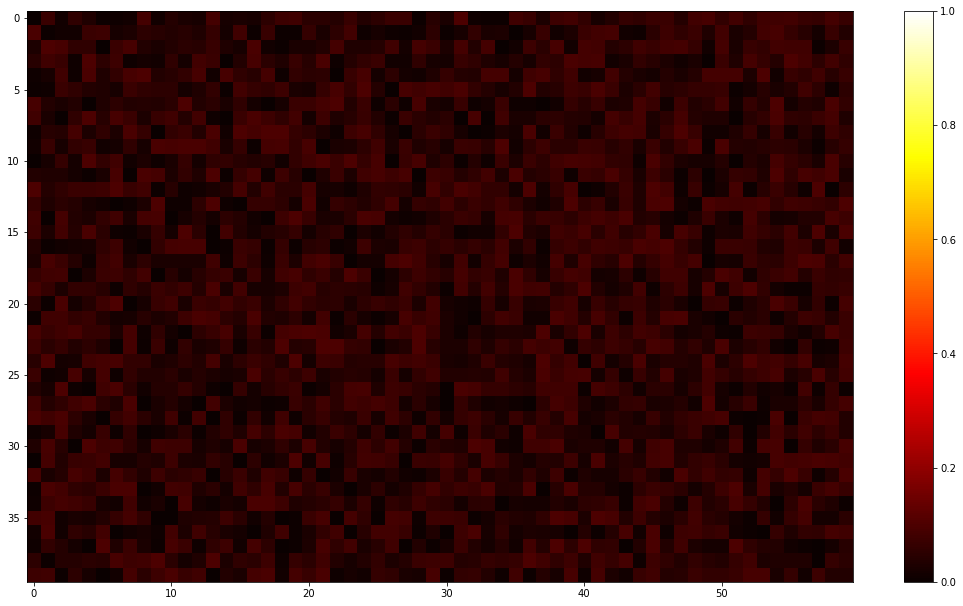

In [90]:
fig_skin, ax_skin = plt.subplots(ncols=1)
img_skin = ax_skin.imshow(skin,cmap = 'hot',vmin = 0,vmax=1, aspect='auto')
fig_skin.set_size_inches(18.5, 10.5)
fig_skin.colorbar(img_skin, ax=ax_skin)
plt.show()

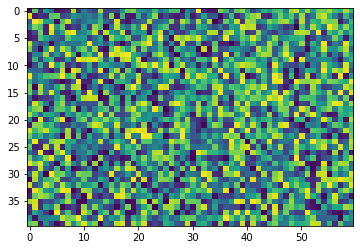

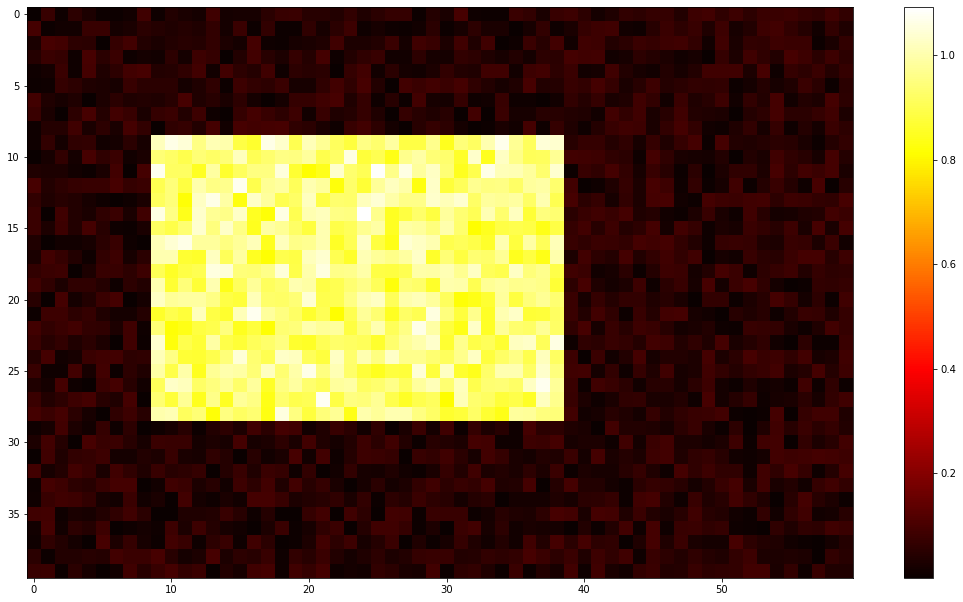

In [91]:

obj = np.zeros([40,60])
obj[9:29,9:39] = np.random.uniform(low = 0.8,high = 1,size= (20,30))
combined = skin+obj
fig_combined, ax_combined = plt.subplots(ncols=1)
img_combined = ax_combined.imshow(combined,cmap = 'hot', aspect='auto')
fig_combined.set_size_inches(18.5, 10.5)
fig_combined.colorbar(img_combined, ax=ax_combined)
plt.show()
# plt.imshow(obj)
# plt.show()

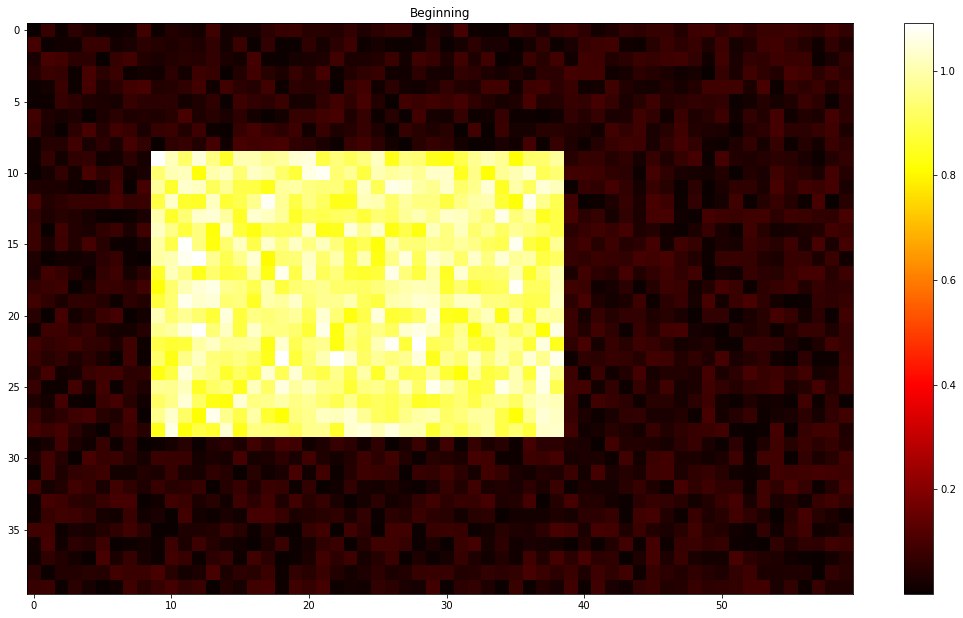

In [84]:
processed = combined.copy()
fig, ax = plt.subplots(ncols=1)
img1 = ax.imshow(processed,cmap = 'hot', aspect='auto')
fig.set_size_inches(18.5, 10.5)

fig.colorbar(img1, ax=ax)
#         plt.imshow(processed)
plt.title("Beginning")
plt.show()

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.atleast_2d is deprecated and will be removed in SciPy 2.0.0, use numpy.atleast_2d instead
  after removing the cwd from sys.path.
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.transpose is deprecated and will be removed in SciPy 2.0.0, use numpy.transpose instead
  after removing the cwd from sys.path.
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.shape is deprecated and will be removed in SciPy 2.0.0, use numpy.shape instead
  """
C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: scipy.ones is deprecated and w

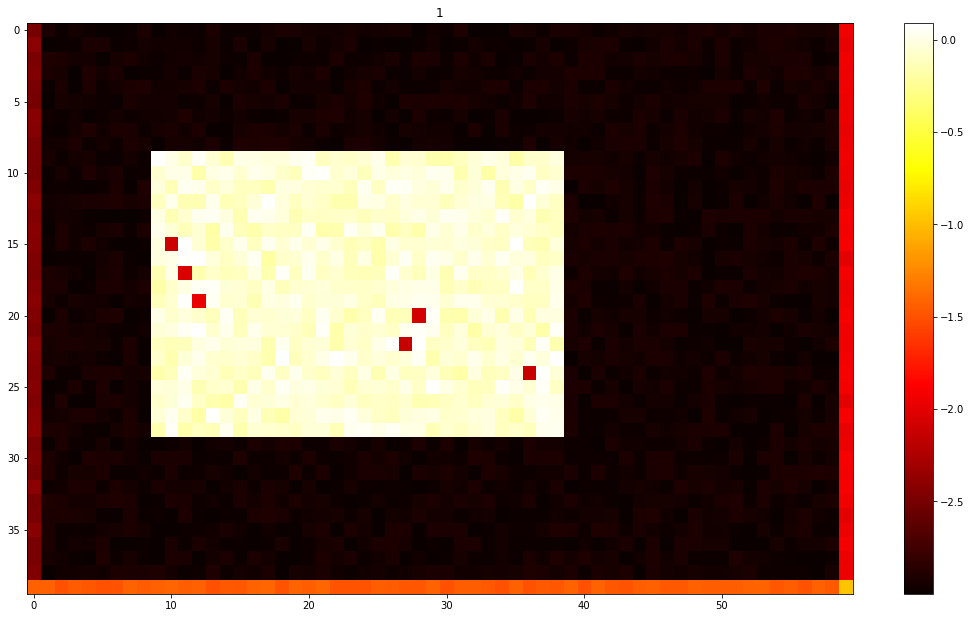

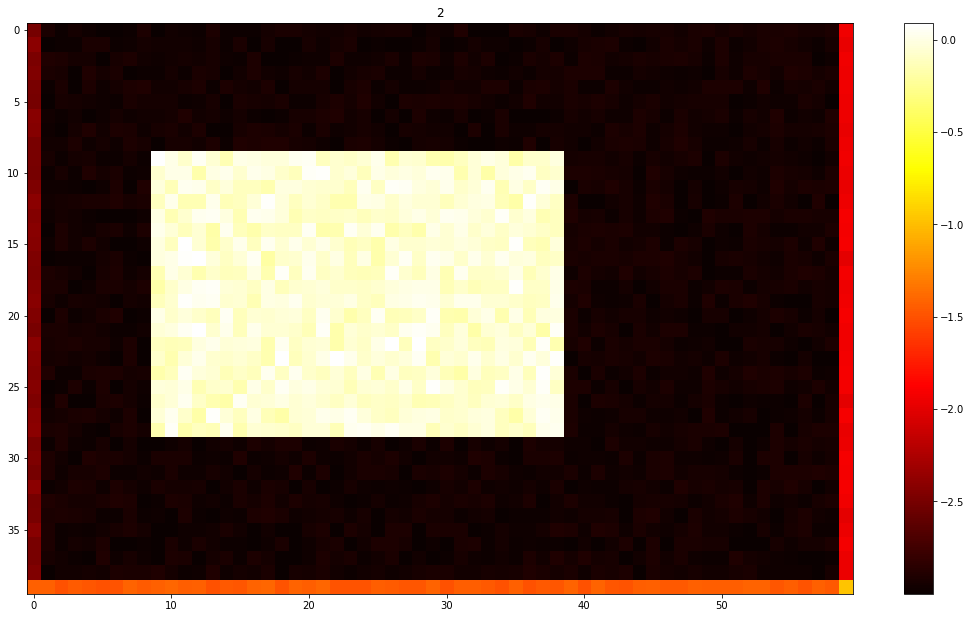

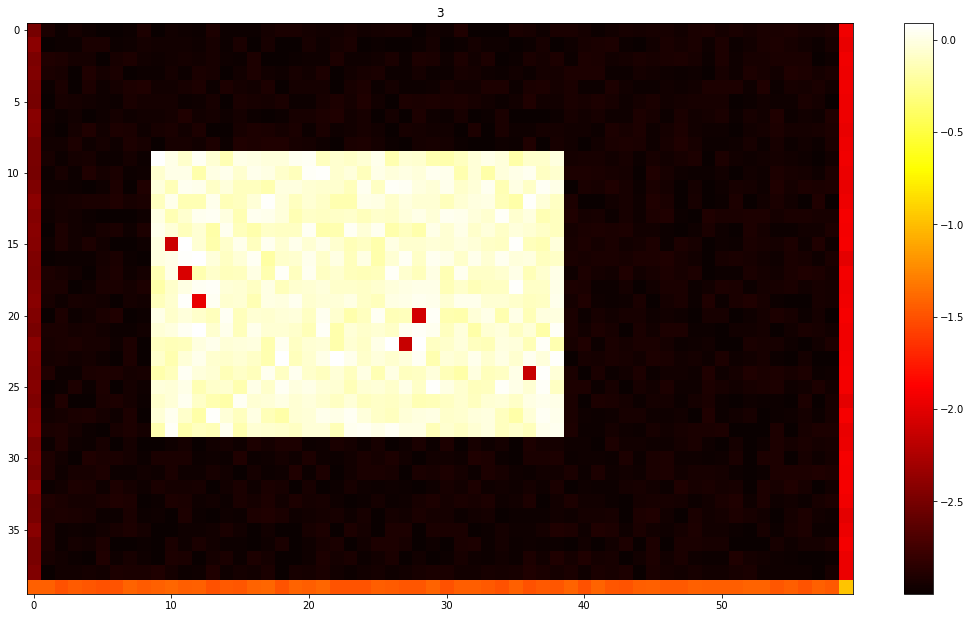

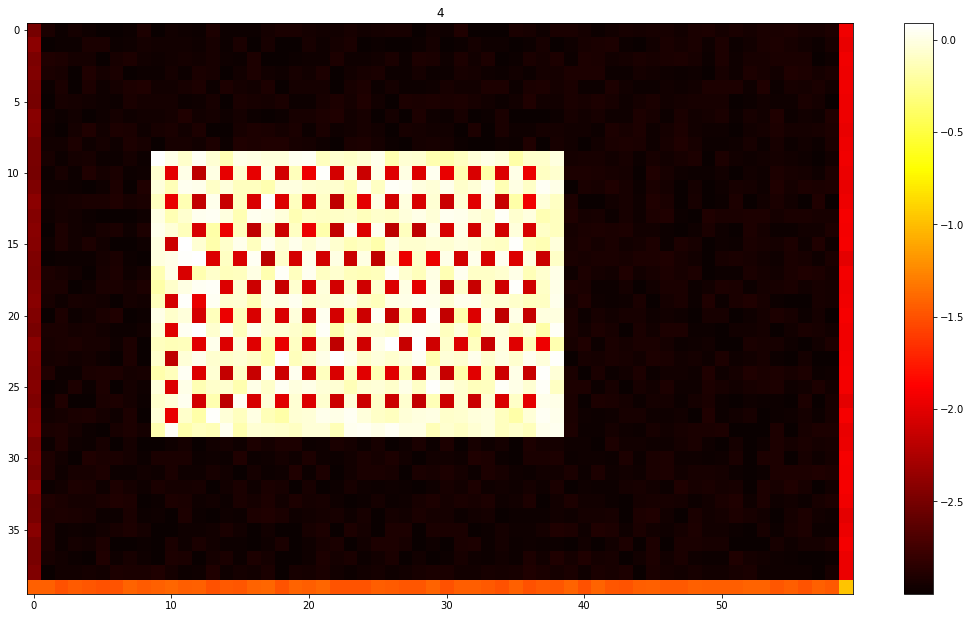

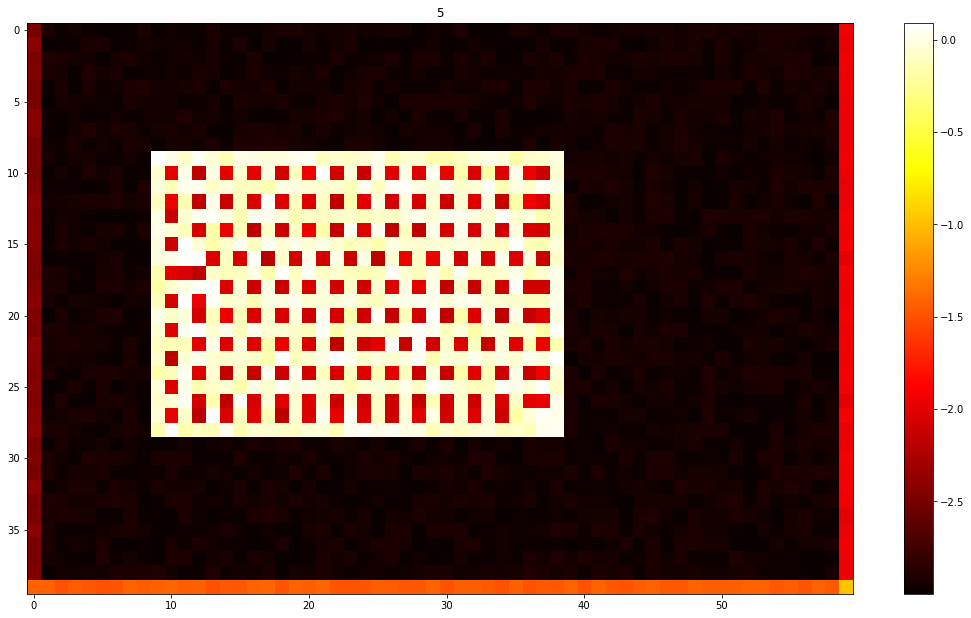

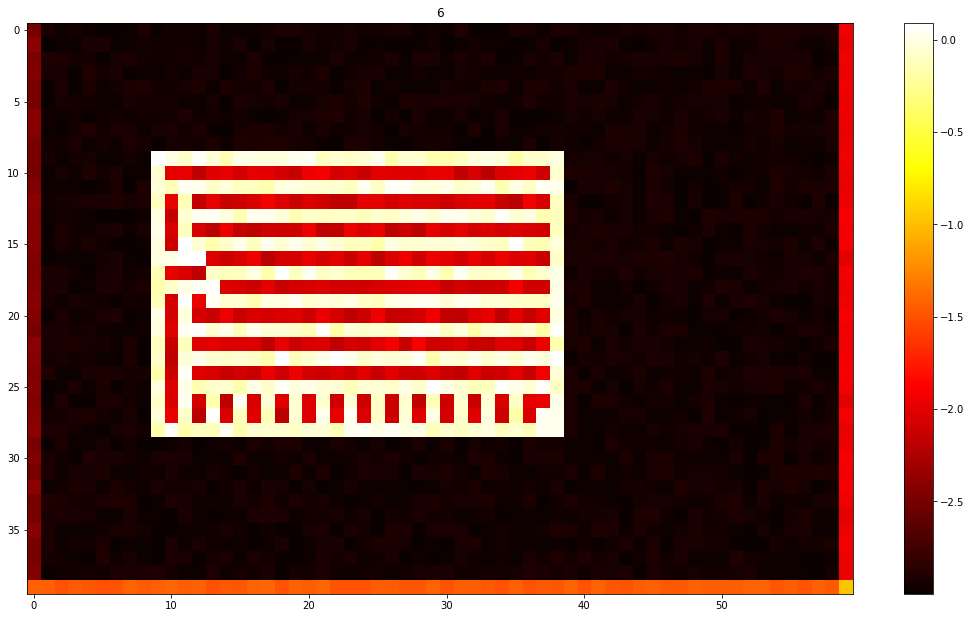

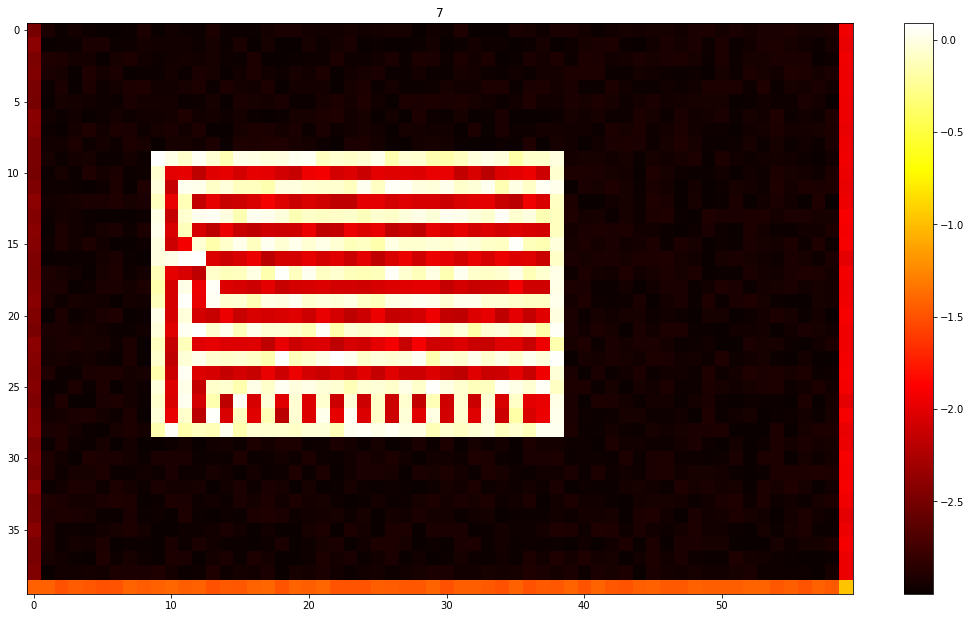

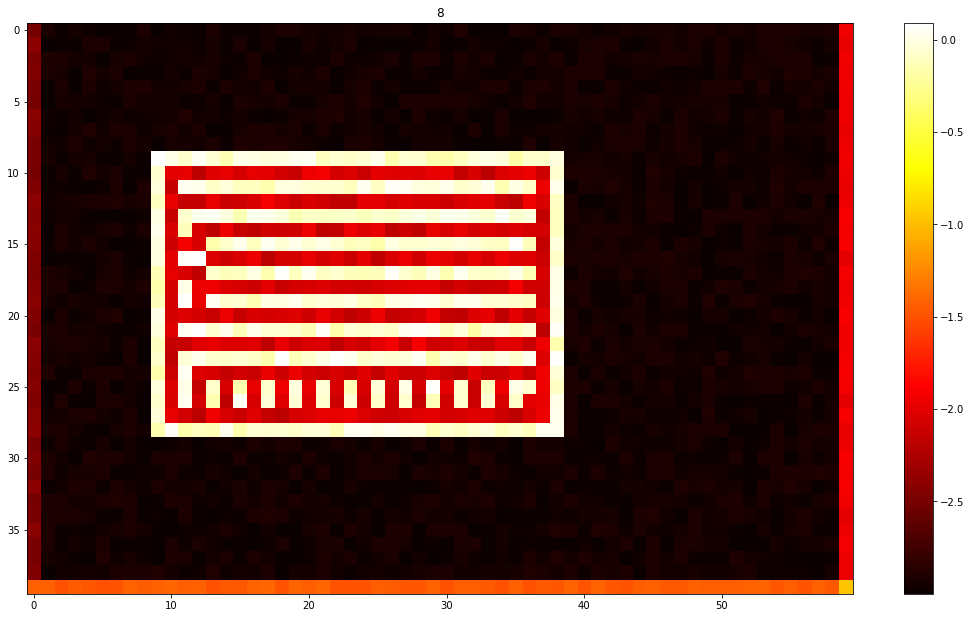

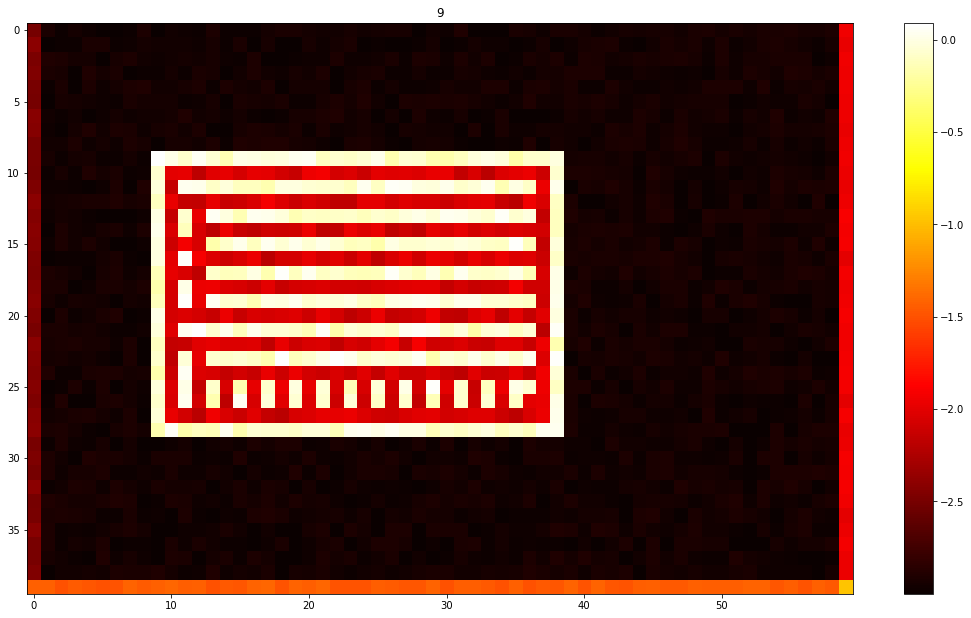

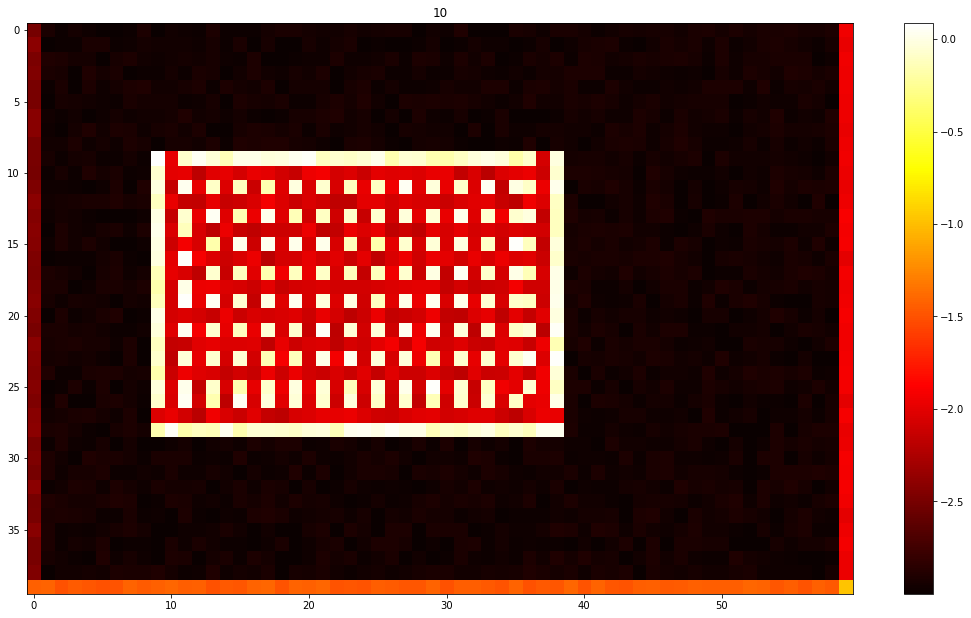

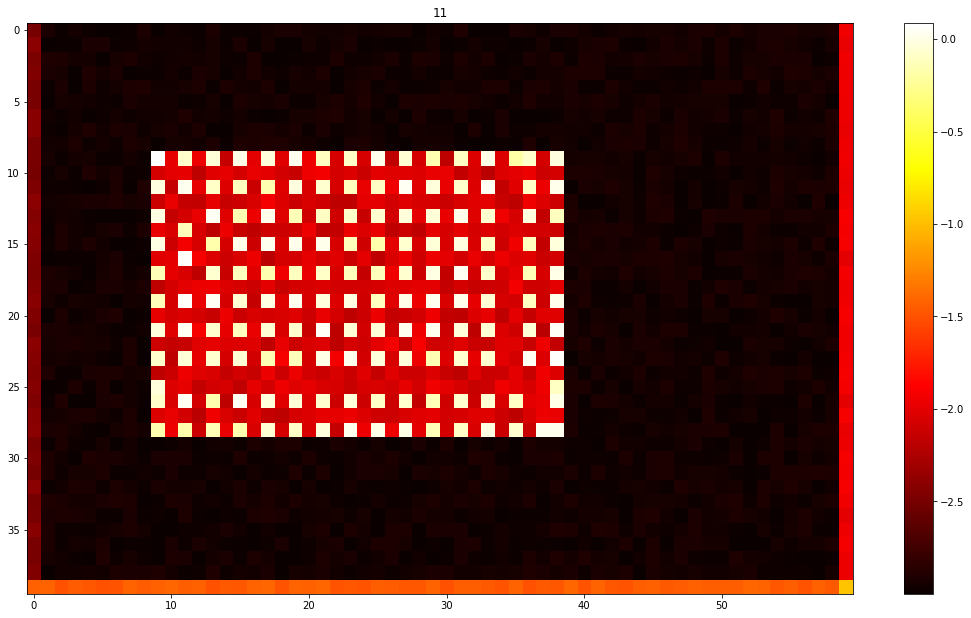

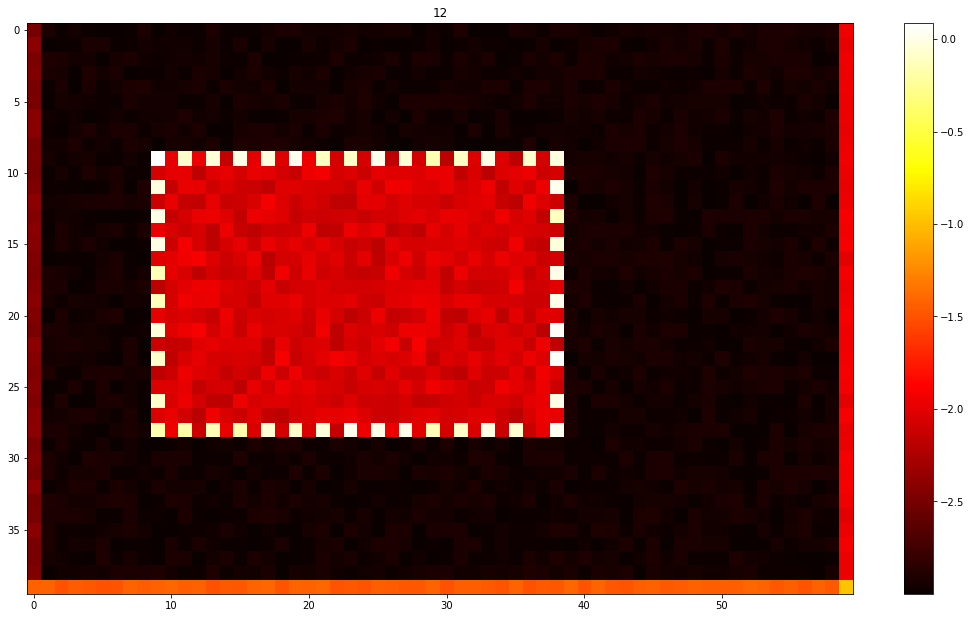

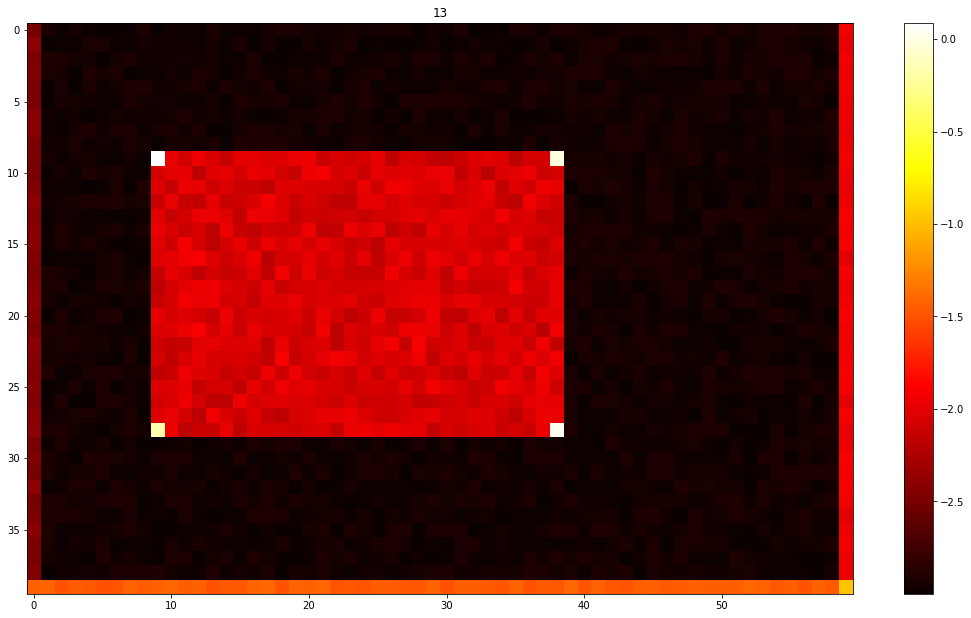

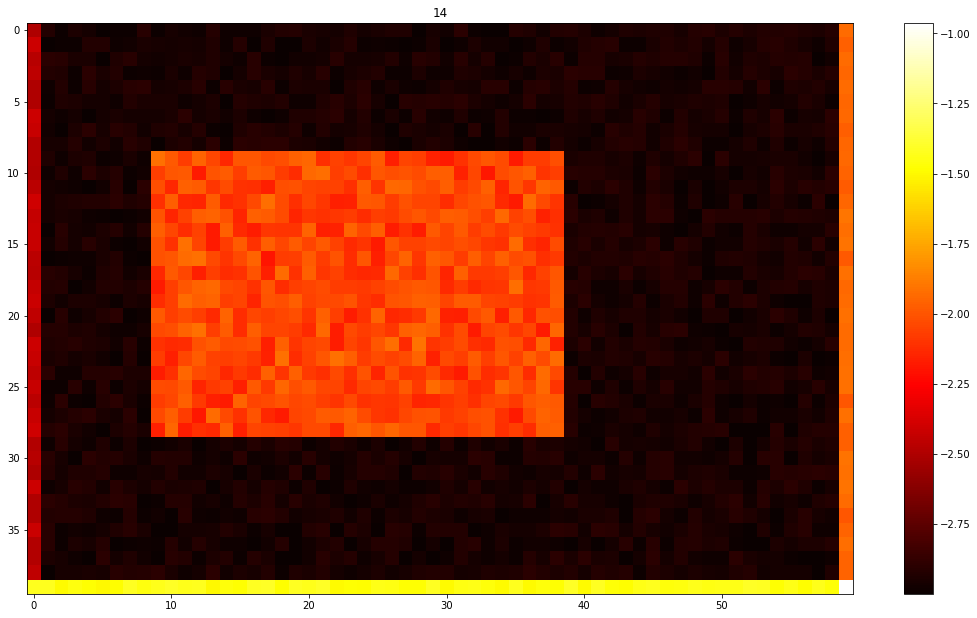

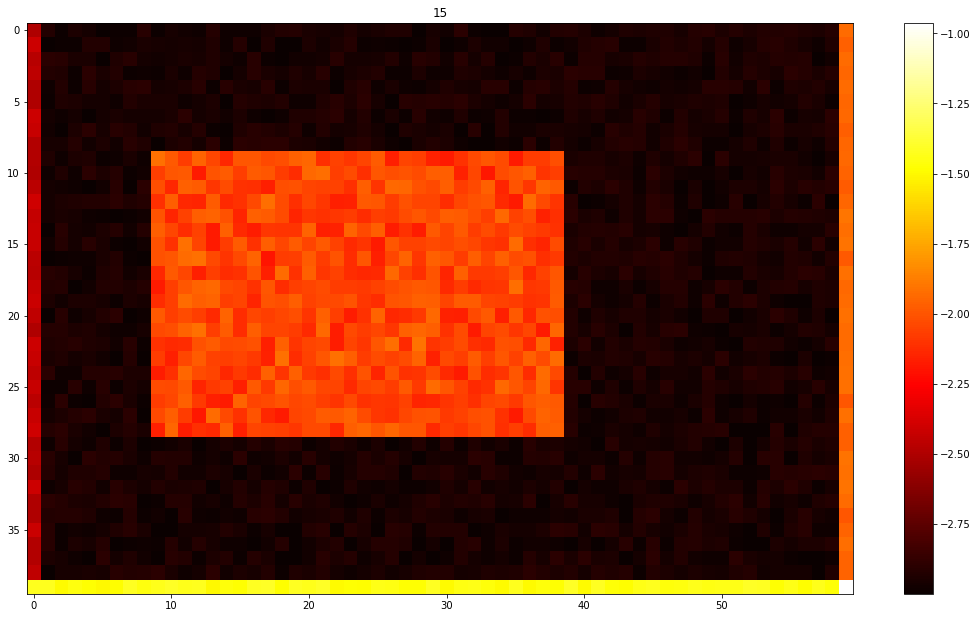

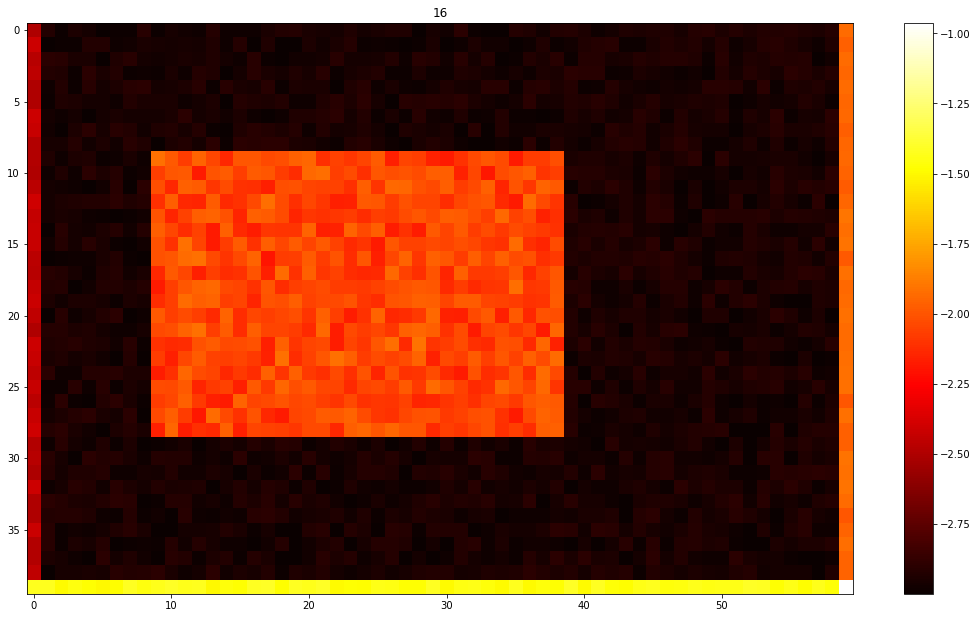

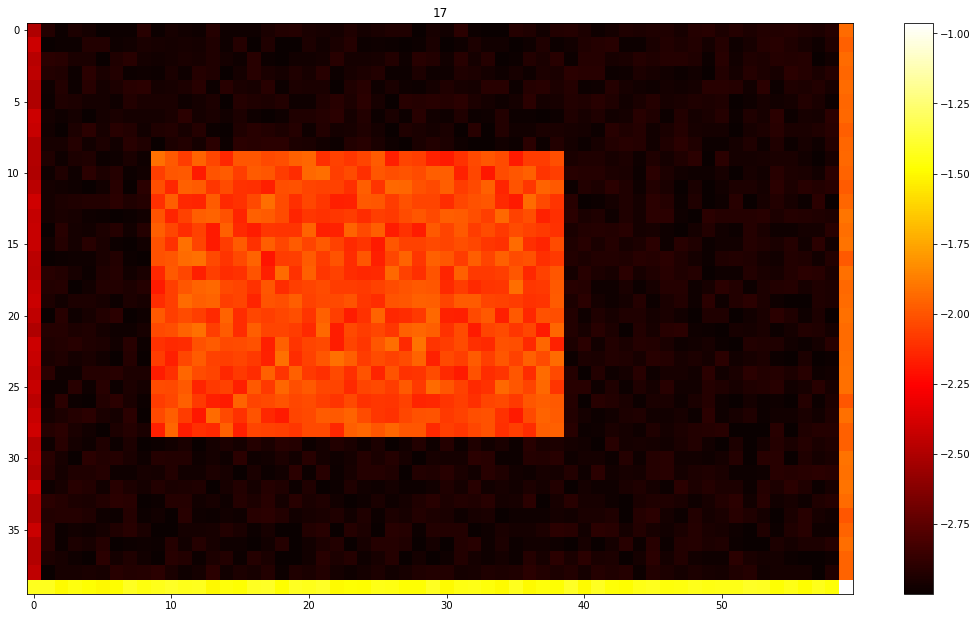

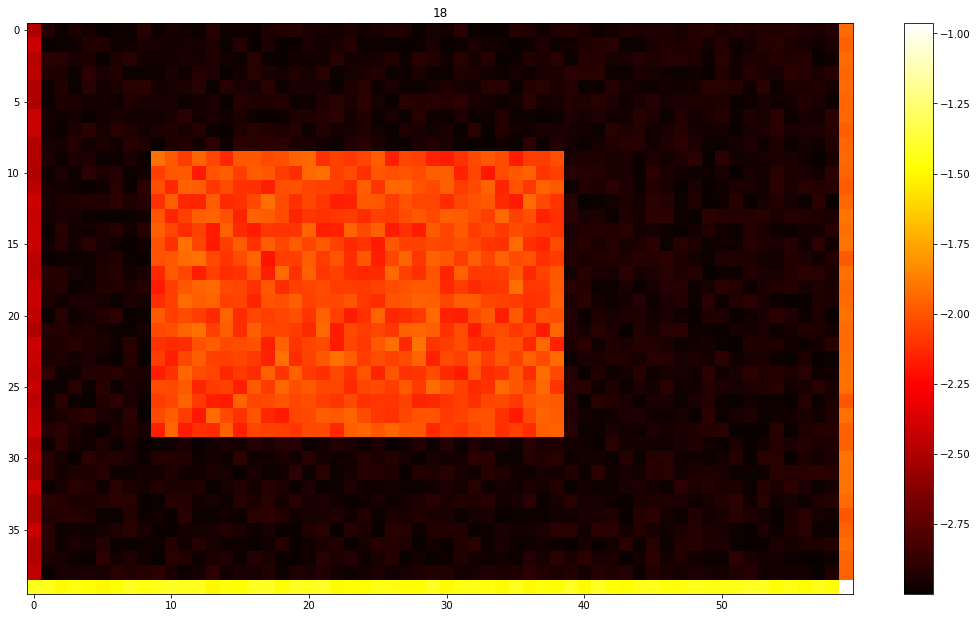

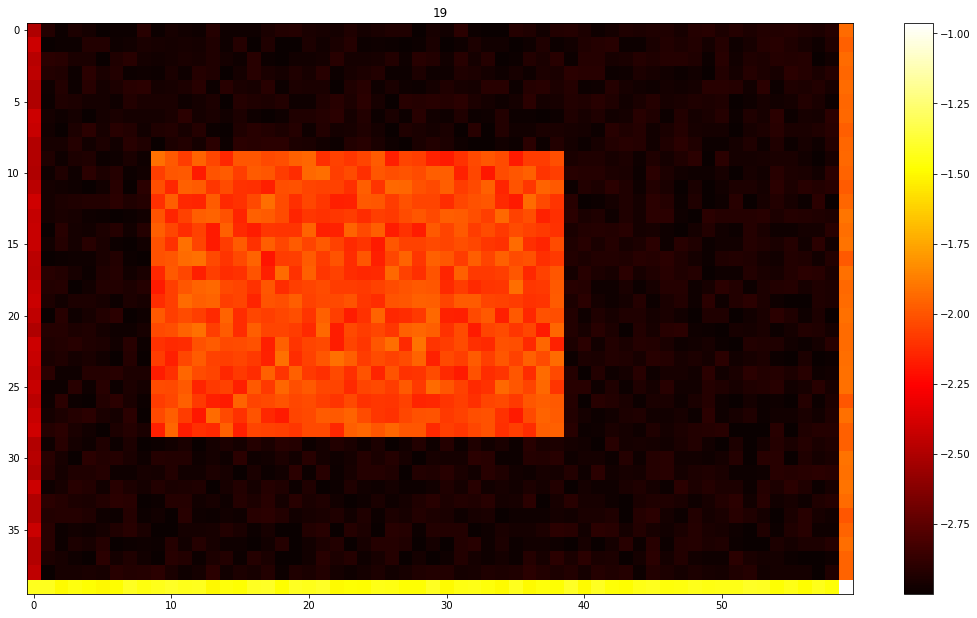

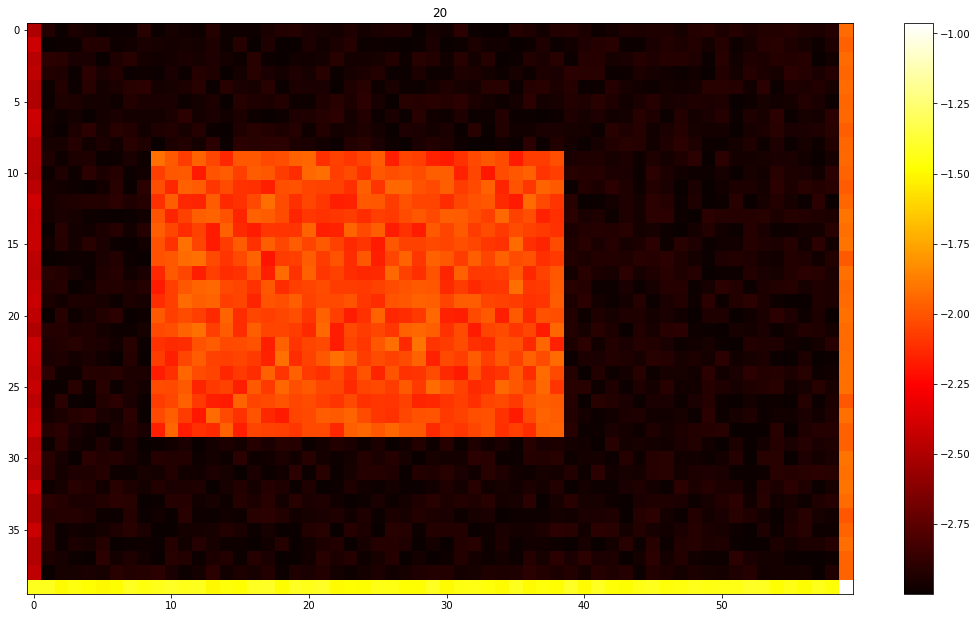

In [83]:
processed = combined.copy()
thresh = 6
for iteration in range(20):
    store_sum = []
    for pixel_row in range(np.shape(combined)[0]):
        for pixel_col in range(np.shape(combined)[1]):
            center = combined[pixel_row,pixel_col]

            surround_cells,surround_idx = nb_vals(processed,[pixel_row,pixel_col])
            surround_cells_buff = surround_cells

            if center >= 0.8:
                neighbor_sum = np.sum(surround_cells)
                store_sum.append(neighbor_sum)
                if neighbor_sum <= thresh:                
                    center = center + 1
                    surround_cells = surround_cells - 0.5
                else:
#                     print(neighbor_sum)
                    center = center - 1
                    surround_cells = surround_cells - 0.5
                
            else:
                center = center - 1
                surround_cells = surround_cells - 0.5
                
                
            for count in range(surround_idx.shape[0]):
                processed[tuple(surround_idx[count])]= surround_cells[count]
            processed[pixel_row,pixel_col] = center
    thresh=thresh-2
    if (iteration+1) % 1 ==0:
        fig, ax = plt.subplots(ncols=1)
        fig.set_size_inches(18.5, 10.5)
        img1 = ax.imshow(processed,cmap = 'hot', aspect='auto')
        fig.colorbar(img1, ax=ax)
        plt.title(iteration+1)
        plt.show()
        
#         plt.colorbar()

